# Numerical Precision

This notebook revises the topic of numerical precision, that was introduced in 2nd year computational physics.

First, let's introduce some terminology.  You will hopefully have encountered the terms _precision_ , _accuracy_ and _resolution_ in the laboratory:
* _Precision_ describes statistical variability in repeated measurements, e.g. as reflected by the standard deviation of a set of experimental results.
* _Accuracy_ describes whether an experimental results is close to the (unknown) true value.
* _Resolution_ describes the smallest change in a measured quantity that a sensor/experiment can register.

Here, we use _numerical precision_ to mean the difference between the result of a numerical calculation and the "truth".  The "truth" can mean what we would obtain from an analytical solution to the problem, although that may not be possible.  In practise, estimating the precision of our methods is a key ingredient in understanding their results.


## Floating Point Precision

Real numbers are usually represented in computers using a floating point format, typically using 64 bits.

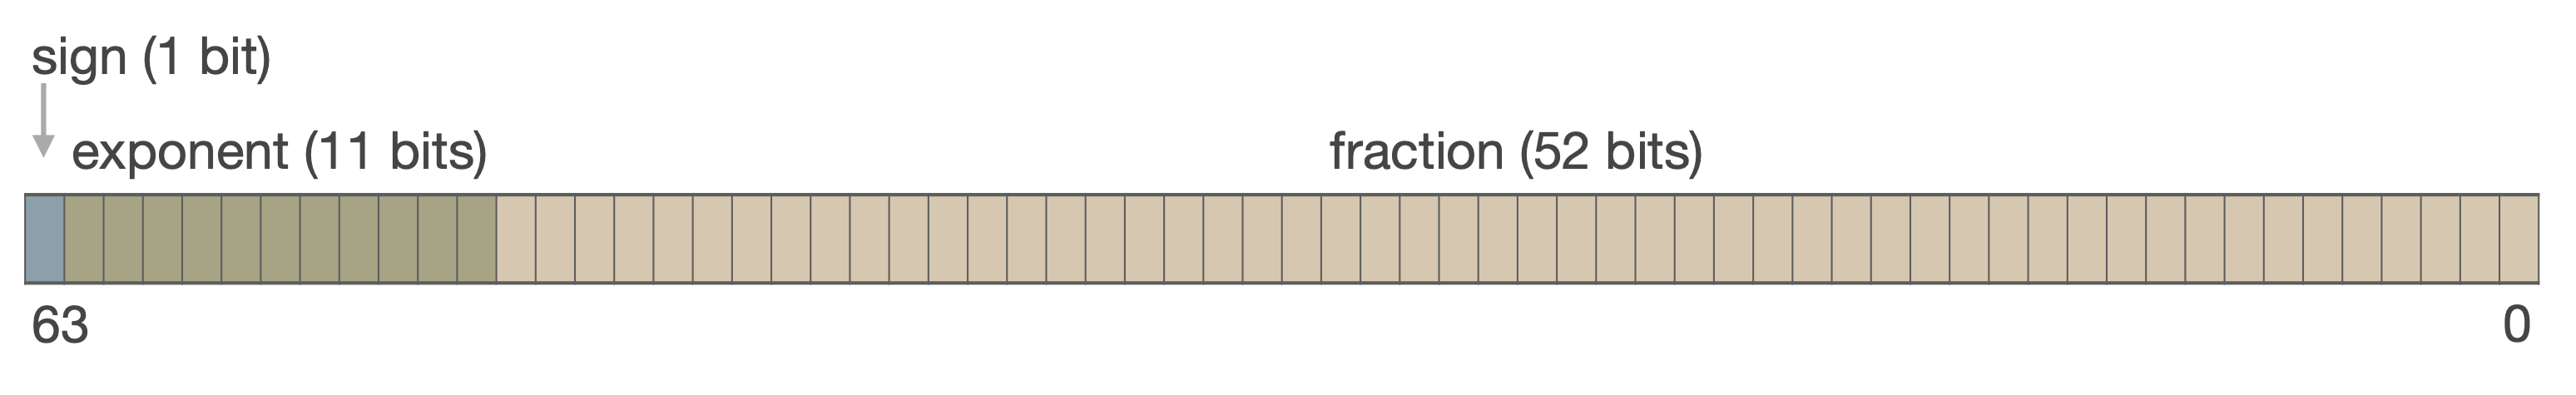

The including values for sign (s), exponent (e), and fraction (f), which are combined to give the stored value :

$-1^s \times f \times 2^e = -1^s$

The fixed precision of the fraction results in a potential rounding error when values are stored and retrieved, also known as a _representation error_. The maximum value, known as the machine epsilon, is

$2^{-53} \sim 10^{-16}$

## Representation Error

To illustrate this, we will attempt to store the value 0.1.  The closest binary value to 0.1 is :

$3602879701896397 / 2^{55}$

In [26]:
value = 3602879701896397 / 2**55
print(value)

0.1


This might be surprising, given what I mentioned above.  However, it's worth noting that the print() command will automatically apply some truncation when printing values to screen.  (This is necessary since most binary fractions do not have exact decimal equivalents).  In order for us to fully control what is displayed, we need to use srtong formatting and specify the number of floating points values to print. Here we print the value using 10 decimal places :

In [27]:
print("{:.10}".format(value))

0.1


And then with 60 decimal places :

In [28]:
print("{:.60}".format(value))

0.1000000000000000055511151231257827021181583404541015625


Note that we we see the same thing just by trying to print the value 0.1, rather than storing the binary encoded version :

In [29]:
print("{:.60}".format(0.1))

0.1000000000000000055511151231257827021181583404541015625


## Magnifying Errors

Usually, the machine epsilon is sufficiently small that it will not impact our results.  However, it's not hard to write code that will take a small uncertainty and turn it into a large one

This is illustrated in the example below.  Here we use two methods to calculate a sine function over a large range of x, in steps `dx`.  In the 1st method we add `dx` to `x` in each iteration of the loop.  In the 2nd method, we compute `x` directly from the loop variable `i` (which has no error!) and the required stepsize.  The plot shows the function for the last few steps.  

As you can see, there is a difference between the two curves.  The value of `dx` will have a small machine epsilon, of order $10^{-16}$, but after $10^8$ iterations of the loop this has increased to an error of around $10^{-8}$,  which is large enough to show up on the plot. Since the 2nd method computes a new `x` on each iteration of the loop, the error remains of order $10^{-16}$.

(Note that this cell will take several minutes to complete!)

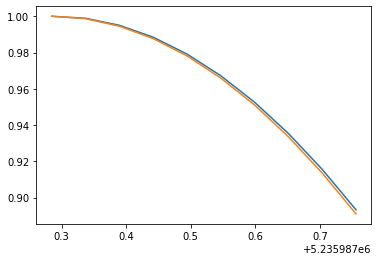

In [100]:
import math

n_points = int(1e8)
dx = math.pi/60
x = 0.

ys = []
zs = []

for i in range(0,n_points):

    # method 1
    ys.append(math.sin(x))
    x = x + dx

    # method 2
    zs.append(math.sin(i*dx))

import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, n_points*dx, n_points+1)
plt.plot(xs[-10:], ys[-10:])
plt.plot(xs[-10:], zs[-10:])
plt.show()